In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# *LOAD DATA VÀ THƯ VIỆN CẦN DÙNG*

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

In [ ]:
#load data
(X_train,y_train),(X_test,y_test) = mnist.load_data()

## **Tính hog**

In [ ]:
#cho x_train
X_train_feature = []
for i in range(len(X_train)):
    feature = hog(X_train[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_train_feature.append(feature)
X_train_feature = np.array(X_train_feature,dtype = np.float32)

In [ ]:
#cho x_test
X_test_feature = []
for i in range(len(X_test)):
    feature = hog(X_test[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_test_feature.append(feature)
X_test_feature = np.array(X_test_feature,dtype=np.float32)

## **Build model vào predict**

In [ ]:
model = LinearSVC(C=10)
model.fit(X_train_feature,y_train)
y_pre = model.predict(X_test_feature)
print(accuracy_score(y_test,y_pre))

0.8988


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# *Predict trên ảnh có nhiều ditgit*

In [ ]:
image = cv2.imread("/content/gdrive/MyDrive/digit.jpg")
im_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
im_blur = cv2.GaussianBlur(im_gray,(5,5),0)
im,thre = cv2.threshold(im_blur,90,255,cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thre,  #
                                            cv2.RETR_EXTERNAL,  # Only detect the outer contour
                                            cv2.CHAIN_APPROX_NONE)  # Store all contour points
rects = [cv2.boundingRect(cnt) for cnt in contours]


# *Predict ditgit*

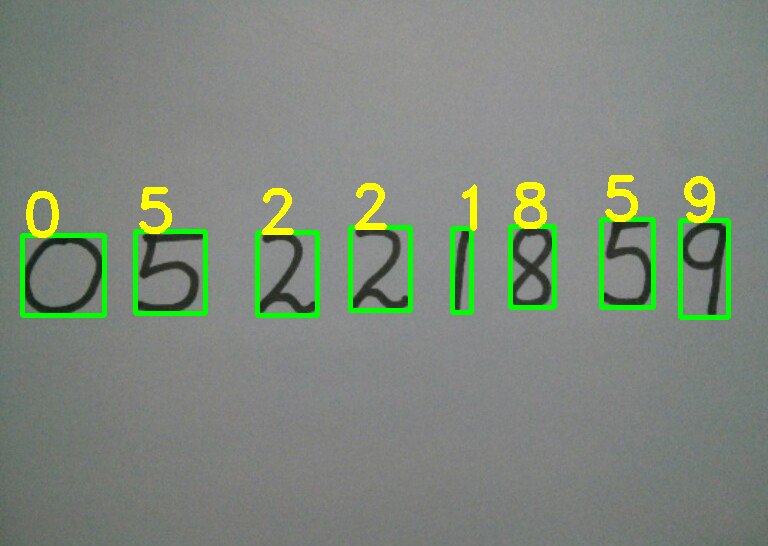

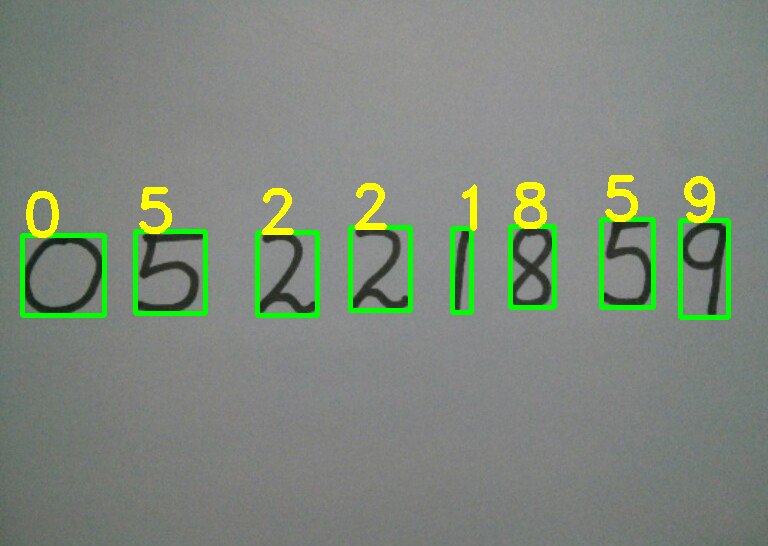

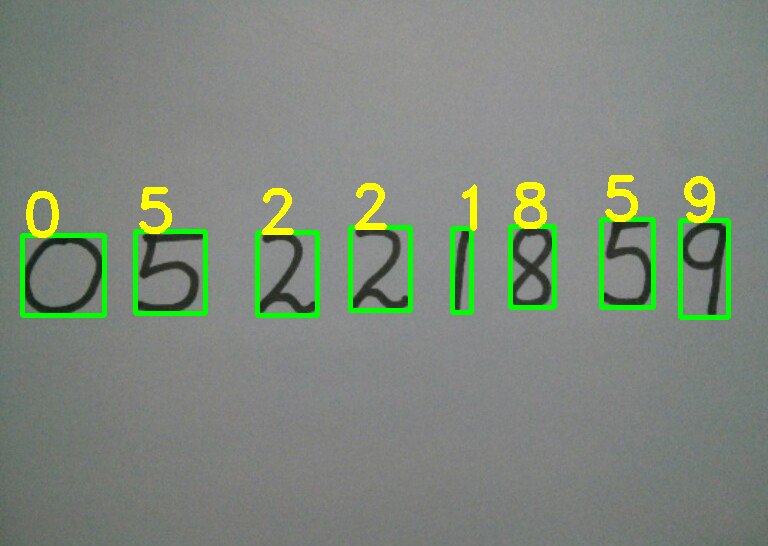

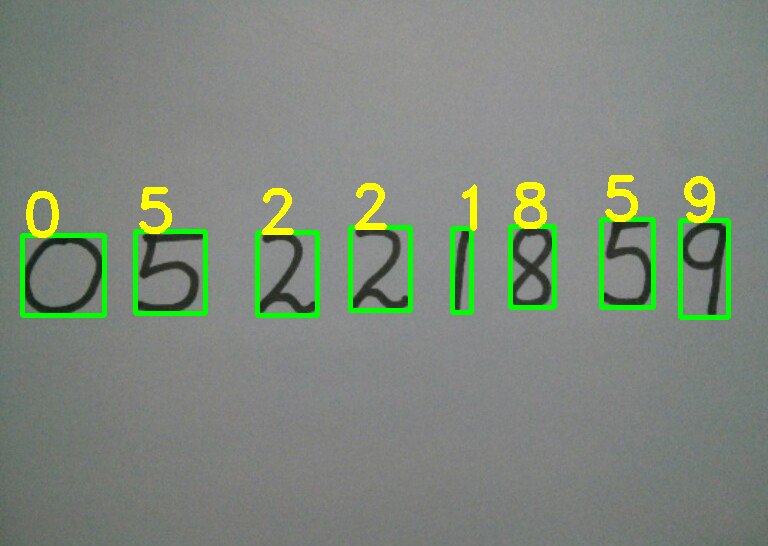

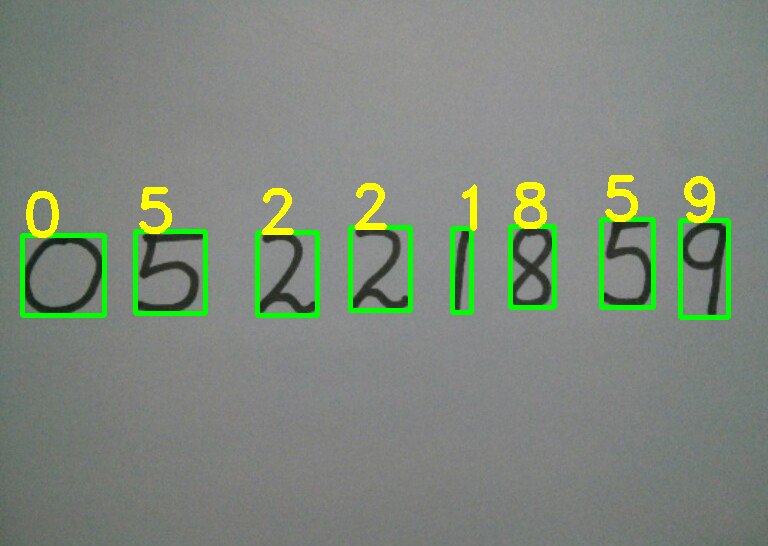

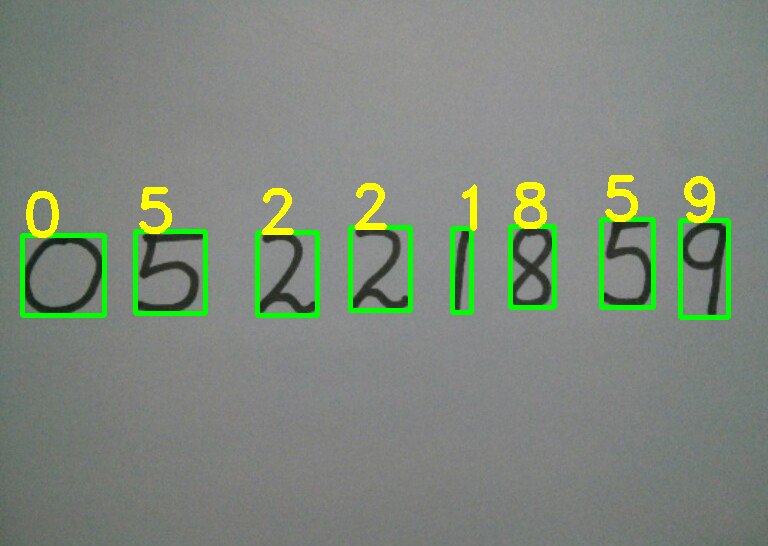

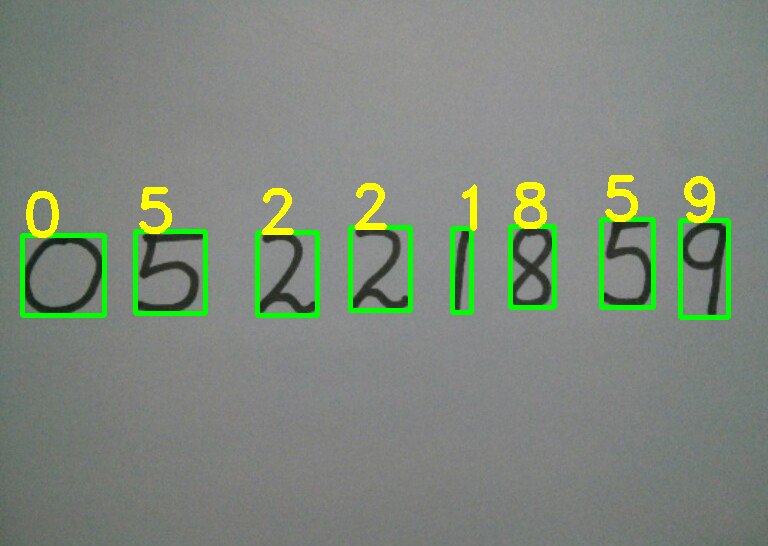

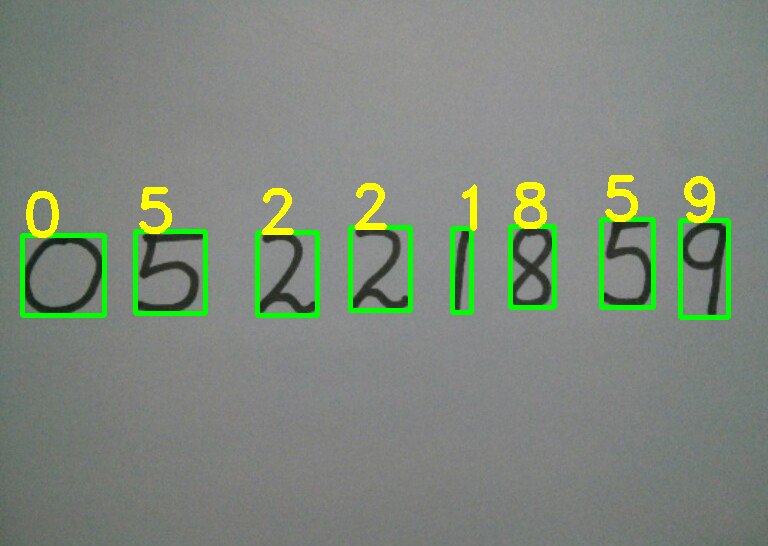

In [ ]:
for i in contours:
    (x,y,w,h) = cv2.boundingRect(i)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
    roi = thre[y:y+h,x:x+w]
    roi = np.pad(roi,(20,20),'constant',constant_values=(0,0))
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1),block_norm="L2")
    nbr = model.predict(np.array([roi_hog_fd], np.float32))
    cv2.putText(image, str(int(nbr[0])), (x, y),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
    from google.colab.patches import cv2_imshow
    cv2_imshow(image)
cv2.imwrite("image_pand.jpg",image)
cv2.waitKey()
cv2.destroyAllWindows()